# Project Statement

While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.
Using the dataset, find the factors that influence price negotiations while buying a house.
There are 79 explanatory variables describing every aspect of residential homes in Ames, Iowa

# Objectives

* Assess the data for key insights
* Identify variables that influence property Sales Price

## Task to Perform

### 1. Importing python library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from collections import Counter

### 2. Read the dataset

#### 2.1 Understand the dataset

In [2]:
housing_df = pd.read_csv("PEP1.csv")

In [15]:
print("\n Generating Descriptive Statistics:")
housing_df.describe()


 Generating Descriptive Statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2.2 Print the name of the columns

In [21]:
housing_variables = list(housing_df.columns)
print("\n Variables in the dataset:\n")
for variable in housing_variables:
    print(housing_variables.index(variable)+1,variable)


 Variables in the dataset:

1 Id
2 MSSubClass
3 MSZoning
4 LotFrontage
5 LotArea
6 Street
7 Alley
8 LotShape
9 LandContour
10 Utilities
11 LotConfig
12 LandSlope
13 Neighborhood
14 Condition1
15 Condition2
16 BldgType
17 HouseStyle
18 OverallQual
19 OverallCond
20 YearBuilt
21 YearRemodAdd
22 RoofStyle
23 RoofMatl
24 Exterior1st
25 Exterior2nd
26 MasVnrType
27 MasVnrArea
28 ExterQual
29 ExterCond
30 Foundation
31 BsmtQual
32 BsmtCond
33 BsmtExposure
34 BsmtFinType1
35 BsmtFinSF1
36 BsmtFinType2
37 BsmtFinSF2
38 BsmtUnfSF
39 TotalBsmtSF
40 Heating
41 HeatingQC
42 CentralAir
43 Electrical
44 1stFlrSF
45 2ndFlrSF
46 LowQualFinSF
47 GrLivArea
48 BsmtFullBath
49 BsmtHalfBath
50 FullBath
51 HalfBath
52 Bedroom
53 Kitchen
54 KitchenQual
55 TotRmsAbvGrd
56 Functional
57 Fireplaces
58 FireplaceQu
59 GarageType
60 GarageYrBlt
61 GarageFinish
62 GarageCars
63 GarageArea
64 GarageQual
65 GarageCond
66 PavedDrive
67 WoodDeckSF
68 OpenPorchSF
69 EnclosedPorch
70 3SsnPorch
71 ScreenPorch
72 PoolArea

#### 2.3 Print the shape of the dataset

In [22]:
housing_shape = housing_df.shape
print("Total number of rows: ",housing_shape[0])
print("Total number of columns: ",housing_shape[1])

Total number of rows:  1460
Total number of columns:  81


#### 2.4 Check for null values

a. Variable with null (missing) value

In [24]:
missing_value_variables = list(housing_df.isna().sum()[housing_df.isna().any()].index)
print("Count of variables with missing values: ",len(missing_value_variables), " \n")
for variable in missing_value_variables:
    print(missing_value_variables.index(variable)+1,variable)

Count of variables with missing values:  19  

1 LotFrontage
2 Alley
3 MasVnrType
4 MasVnrArea
5 BsmtQual
6 BsmtCond
7 BsmtExposure
8 BsmtFinType1
9 BsmtFinType2
10 Electrical
11 FireplaceQu
12 GarageType
13 GarageYrBlt
14 GarageFinish
15 GarageQual
16 GarageCond
17 PoolQC
18 Fence
19 MiscFeature


b. Distribution of missing values

In [25]:
count_missing_values = housing_df.isna().sum().sort_values(ascending=False)[housing_df.isna().sum()>0]
percentage_missing_values = round(housing_df.isna().sum() [housing_df.isna().sum()>0] / housing_df.shape[0] * 100,2)
pd.concat([count_missing_values,percentage_missing_values],axis=1).rename(columns = {0:"MissingValueCount",1:"PercentMissingValue"})

,MissingValueCount,PercentMissingValue
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


#### 2.5 Print unique values

In [26]:
# print("Total unique values per Variable:\n",housing.select_dtypes(include="O").nunique(),"\n\n")
# print(housing.select_dtypes(include="O").apply(lambda col: col.unique()))

for col in housing_df.columns:
    print('Variable = ', col)
    print("Unique value count: ",housing_df[col].nunique())
    print(housing_df[col].unique())
    print('-'*100,"\n")

Variable =  Id
Unique value count:  1460
[   1    2    3 ... 1458 1459 1460]
---------------------------------------------------------------------------------------------------- 

Variable =  MSSubClass
Unique value count:  15
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
---------------------------------------------------------------------------------------------------- 

Variable =  MSZoning
Unique value count:  5
['RL' 'RM' 'C (all)' 'FV' 'RH']
---------------------------------------------------------------------------------------------------- 

Variable =  LotFrontage
Unique value count:  110
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.

#### 2.6 Select the numerical and categorical variable

a. List of numerical variables

In [27]:
numerical_variables = list(housing_df.select_dtypes(exclude="O"))
print("Count of numerical variables: ", len(numerical_variables),"\n")
print("Numerical variable names:\n")
for variable in numerical_variables:
    print(numerical_variables.index(variable)+1,variable)

Count of numerical variables:  38 

Numerical variable names:

1 Id
2 MSSubClass
3 LotFrontage
4 LotArea
5 OverallQual
6 OverallCond
7 YearBuilt
8 YearRemodAdd
9 MasVnrArea
10 BsmtFinSF1
11 BsmtFinSF2
12 BsmtUnfSF
13 TotalBsmtSF
14 1stFlrSF
15 2ndFlrSF
16 LowQualFinSF
17 GrLivArea
18 BsmtFullBath
19 BsmtHalfBath
20 FullBath
21 HalfBath
22 Bedroom
23 Kitchen
24 TotRmsAbvGrd
25 Fireplaces
26 GarageYrBlt
27 GarageCars
28 GarageArea
29 WoodDeckSF
30 OpenPorchSF
31 EnclosedPorch
32 3SsnPorch
33 ScreenPorch
34 PoolArea
35 MiscVal
36 MoSold
37 YrSold
38 SalePrice


b. List of categorical variables

In [28]:
categorical_variables = list(housing_df.select_dtypes(include="O"))
print("Count of categorical variables: ", len(categorical_variables),"\n")
for variable in categorical_variables:
    print(categorical_variables.index(variable)+1,variable)

Count of categorical variables:  43 

1 MSZoning
2 Street
3 Alley
4 LotShape
5 LandContour
6 Utilities
7 LotConfig
8 LandSlope
9 Neighborhood
10 Condition1
11 Condition2
12 BldgType
13 HouseStyle
14 RoofStyle
15 RoofMatl
16 Exterior1st
17 Exterior2nd
18 MasVnrType
19 ExterQual
20 ExterCond
21 Foundation
22 BsmtQual
23 BsmtCond
24 BsmtExposure
25 BsmtFinType1
26 BsmtFinType2
27 Heating
28 HeatingQC
29 CentralAir
30 Electrical
31 KitchenQual
32 Functional
33 FireplaceQu
34 GarageType
35 GarageFinish
36 GarageQual
37 GarageCond
38 PavedDrive
39 PoolQC
40 Fence
41 MiscFeature
42 SaleType
43 SaleCondition


c. Outlier Detection

In [30]:
def detect_outlier(df, variables):
    
    outlier_indices = []
    
    for var in variables:
        
        # find Q1
        q1 = df[var].quantile(.25)
        
        # find Q3
        q3 = df[var].quantile(.75)
        
        # calculate IQR
        iqr = q3-q1
        
        #outlier step
        outlier_step = 1.5 * iqr
        
        # outlier and their indices
        outlier_list_var = df[(df[var] < q1 - outlier_step) | (df[var] > q3 + outlier_step)].index
        
        # store indices
        outlier_indices.extend(outlier_list_var)
        
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [33]:
continuous_variable = housing_df[housing_df.nunique()[housing_df.nunique()>100].index].drop(columns=["Id"])
print("\n Dataset rows having atleast 2 variable values as outlier")
housing_df.loc[detect_outlier(housing_df,continuous_variable.columns)]


 Dataset rows having atleast 2 variable values as outlier


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1044,1045,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,278000
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000


In [35]:
print("\n Updated dataset after dropping rows with alteast 2 variable values as outlier")
housing_df_updated = housing_df.drop(detect_outlier(housing_df,continuous_variable.columns),axis=0).reset_index(drop=True)
housing_df_updated


 Updated dataset after dropping rows with alteast 2 variable values as outlier


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1388,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1389,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1390,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 3. Missing Value Treatment

3.1. Dropping variables with nearly 50% missing data

In [37]:
housing_df_updated.drop(columns=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],inplace=True)

3.2. Imputing the missing values in variable LotFrontage with its median

In [39]:
housing_df_updated.LotFrontage.fillna(housing_df_updated.LotFrontage.median(),inplace=True)

In [43]:
print("\n Distribution of available Missing Value:")
round(housing_df_updated.isna().sum()[housing_df_updated.isna().sum()>0] / housing_df_updated.shape[0] * 100,2)


 Distribution of available Missing Value:


MasVnrType      0.43
MasVnrArea      0.43
BsmtQual        2.59
BsmtCond        2.59
BsmtExposure    2.66
BsmtFinType1    2.59
BsmtFinType2    2.66
Electrical      0.07
GarageType      5.75
GarageYrBlt     5.75
GarageFinish    5.75
GarageQual      5.75
GarageCond      5.75
dtype: float64

### 4. Descriptive Stats and EDA

#### 4.1 EDA of Numerical Variable

4.1.1 Visualizing the distrbution of target variable "SalePrice"

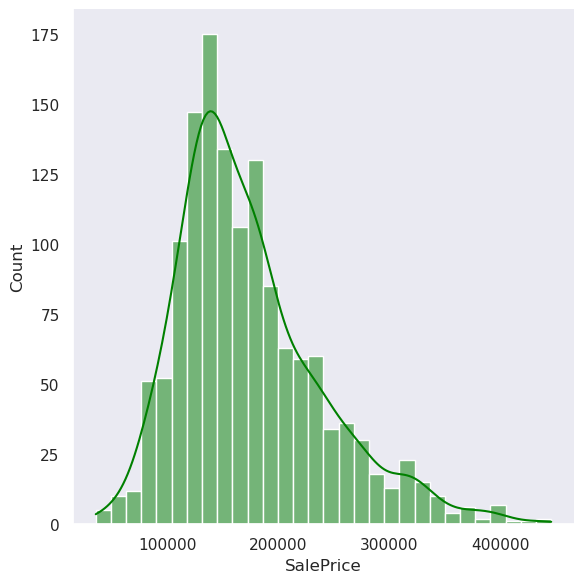

In [44]:
sns.set(style="dark")
sns.displot(housing_df_updated["SalePrice"], kde=True, color="green", height=6)
plt.show()

4.1.2 Creating new variable property age using variable YearBuild and visualizing the data distribution for SalesPrice by PropertyAge

In [45]:
housing_df_updated.insert(loc = housing_df_updated.columns.get_loc("YearBuilt")+1, column="PropertyAge", value= (dt.date.today().year)-housing_df_updated.YearBuilt)

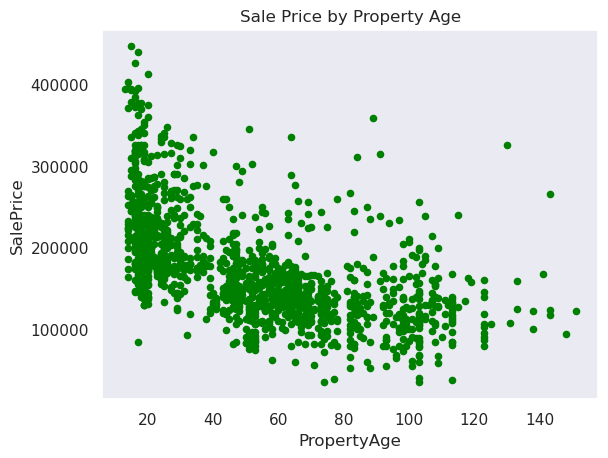

In [46]:
housing_df_updated.plot(kind="scatter", x="PropertyAge", y="SalePrice", title="Sale Price by Property Age", color="green")
plt.show()

4.1.3 Visualizing the frequency distribution per numerical variable using histogram

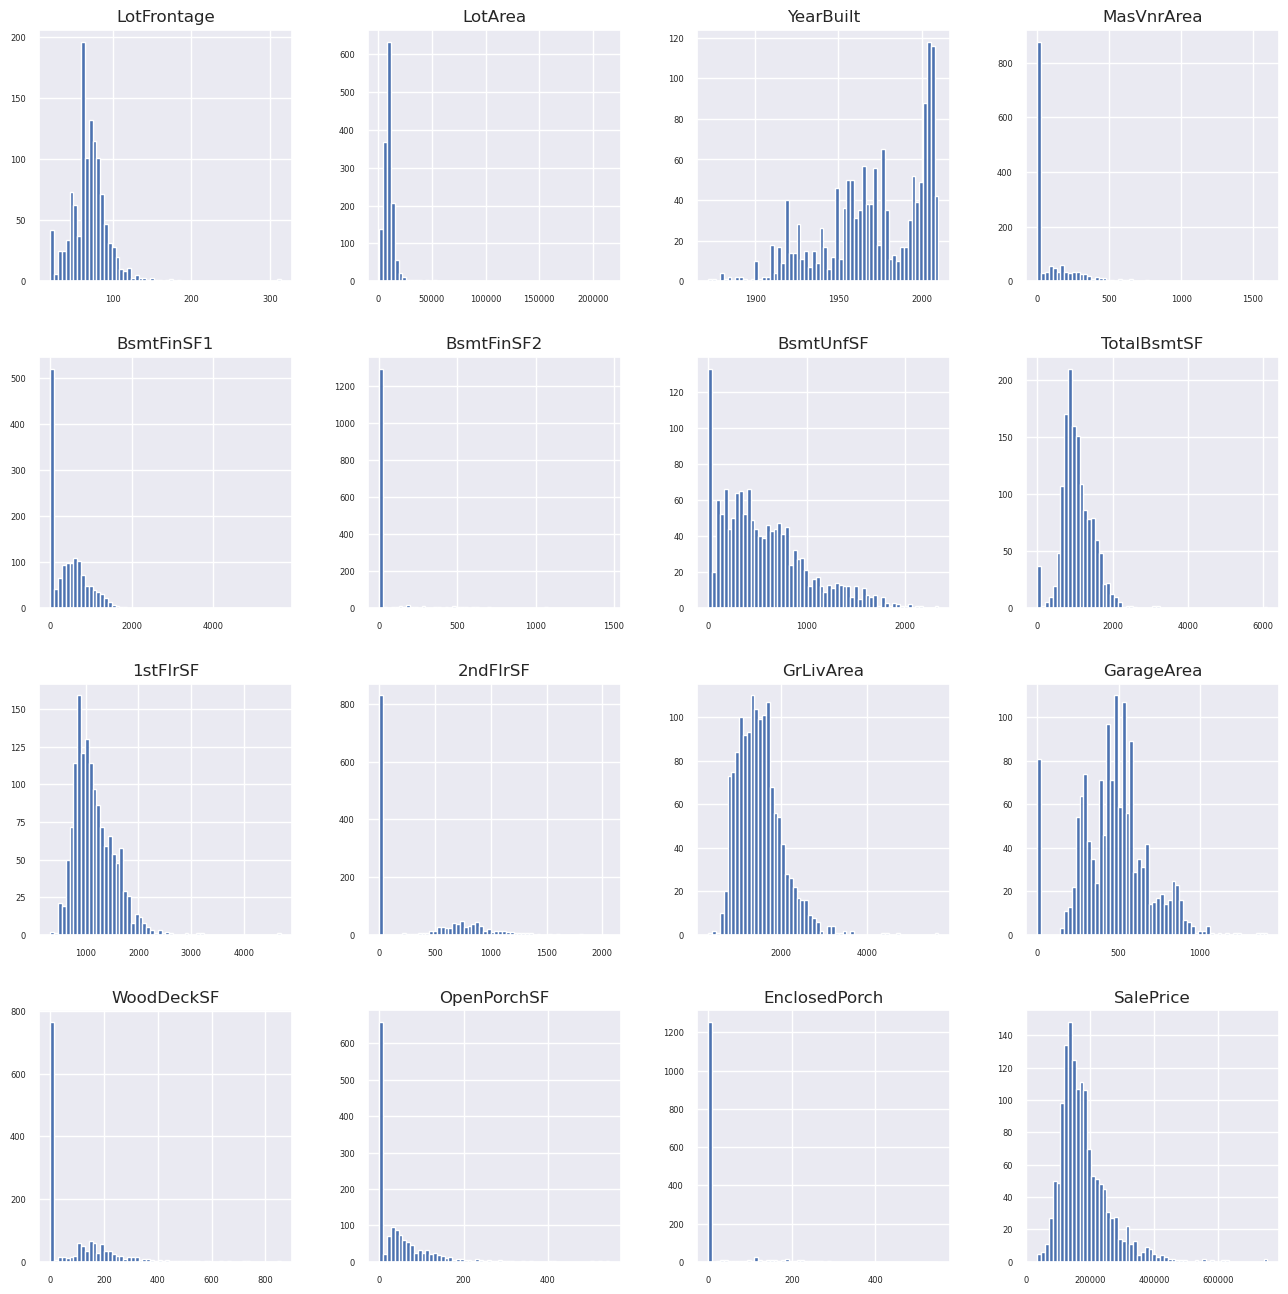

In [47]:
continuous_variable.hist(bins=60, figsize=(16,16), xlabelsize=6, ylabelsize=6)
plt.show()

4.1.4 Visualizing the data distribution for SalesPrice by LotArea

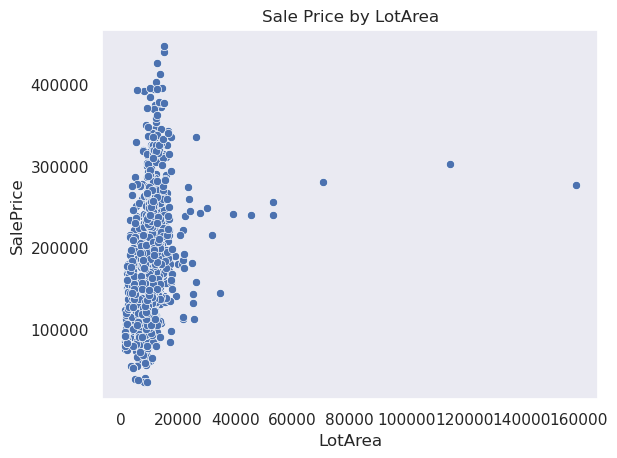

In [48]:
sns.scatterplot(data=housing_df_updated, x="LotArea", y="SalePrice")
plt.title("Sale Price by LotArea")
plt.show()

#### 4.2 Identify Skewness and Distribution

In [51]:
print("Skewness: %f" %housing_df_updated["SalePrice"].skew())

Skewness: 1.019419


#### 4.3 Identify Significant Variables using Correlation Matrix

In [69]:
corr = housing_df_updated.select_dtypes(exclude="O").corr()["SalePrice"]
print("\n Variables with high linear correlation with SalePrice (> 0.6 OR <-0.6):","\n\n",pd.DataFrame(corr[(corr>.6)|(corr<-.6)]).drop("SalePrice",axis=0))


 Variables with high linear correlation with SalePrice (> 0.6 OR <-0.6): 

              SalePrice
OverallQual   0.804390
TotalBsmtSF   0.608439
GrLivArea     0.691485
GarageCars    0.651689
GarageArea    0.638518



 Variable Influencing Sales Price:


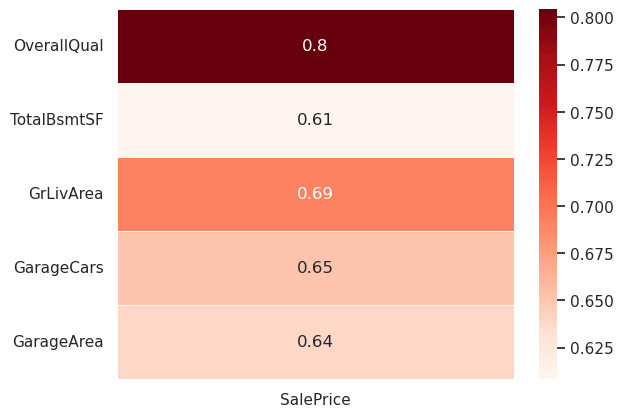

In [81]:
print("\n Variable Influencing Sales Price:")
sns.heatmap(pd.DataFrame(corr[(corr>.6)|(corr<-.6)]).drop("SalePrice",axis=0),cmap="Reds",annot=True,linecolor="w",linewidths=0.5)
plt.show()

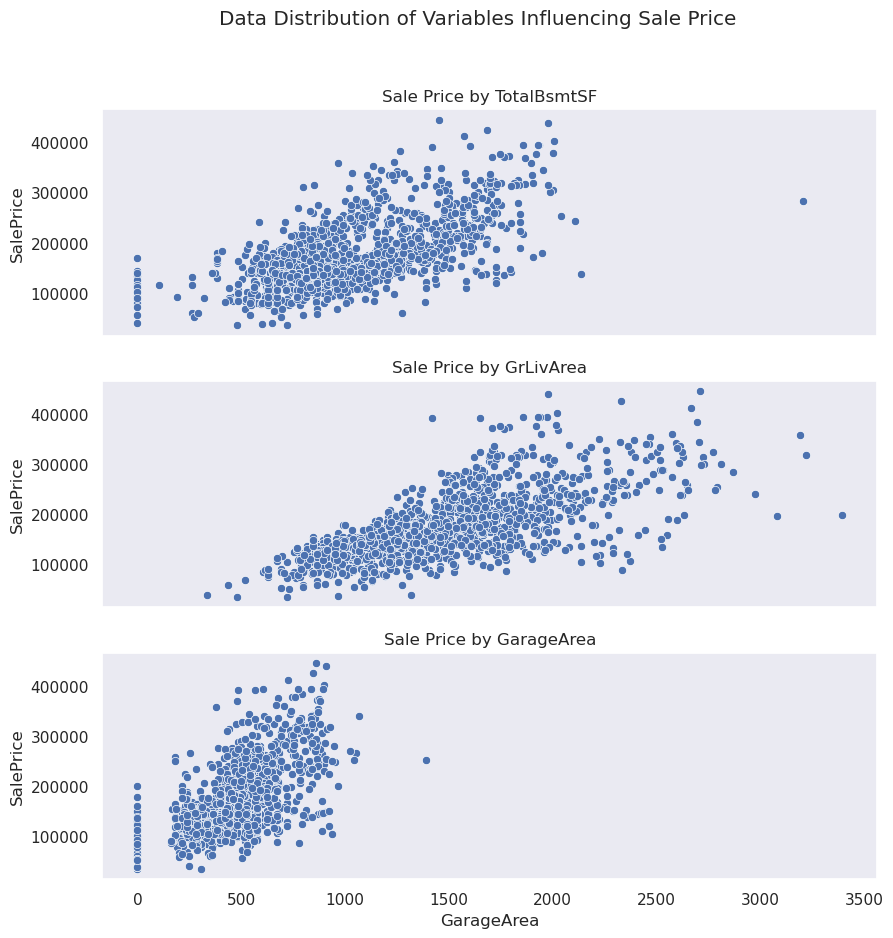

In [82]:
fig, axes = plt.subplots(3,1,sharex=True, figsize = (10,10))

fig.suptitle("Data Distribution of Variables Influencing Sale Price")

sns.scatterplot(ax=axes[0], data=housing_df_updated, x="TotalBsmtSF", y="SalePrice")
axes[0].set_title("Sale Price by TotalBsmtSF")

sns.scatterplot(ax=axes[1], data=housing_df_updated, x="GrLivArea", y="SalePrice")
axes[1].set_title("Sale Price by GrLivArea")

sns.scatterplot(ax=axes[2], data=housing_df_updated, x="GarageArea", y="SalePrice")
axes[2].set_title("Sale Price by GarageArea")

plt.show()

#### 4.4 Pair plot for Distribution Density


 Visualization Variables Influencing Sale Price:


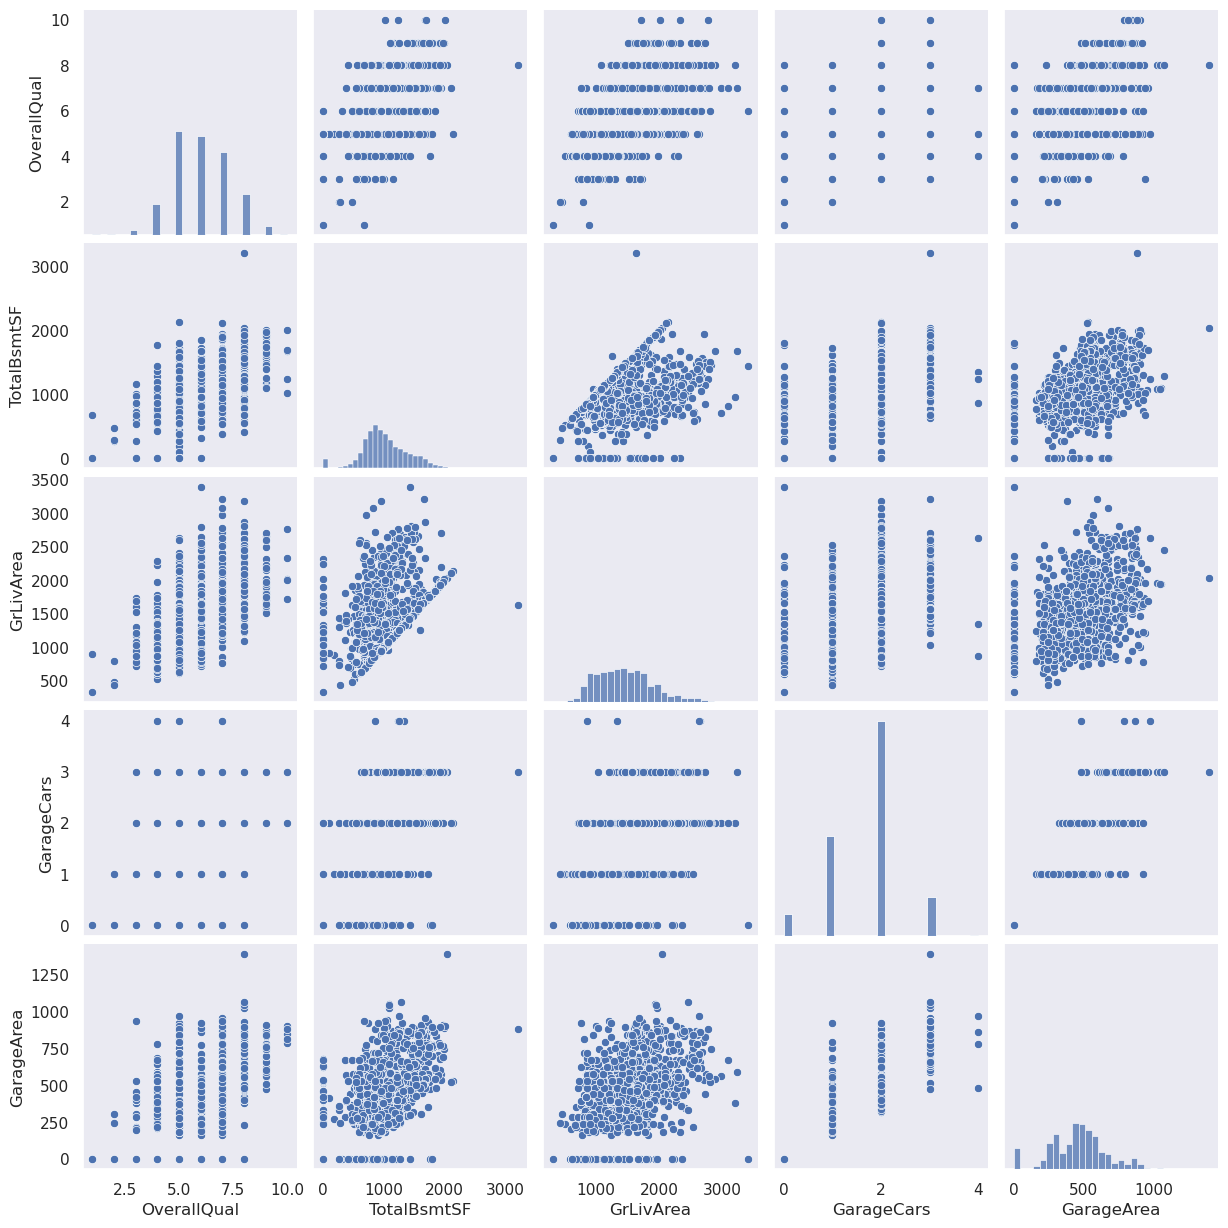

In [84]:
print("\n Visualization Variables Influencing Sale Price:")
significant_variables = list(pd.DataFrame(corr[(corr>.6)|(corr<-.6)]).drop("SalePrice",axis=0).index)
sns.pairplot(data=housing_df_updated[significant_variables])
plt.show()